In [5]:
# 라이브러리 로드
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPool1D
from keras.datasets import imdb

In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [7]:
#seed 고정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [8]:
(x_train,y_train),(x_test,y_test) =  imdb.load_data(num_words=5000)

17473536/17464789 [==============================] - 0s 0us/step


In [9]:
# 데이터 전처리
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

In [10]:
# 모델 설정
model = Sequential()
model.add(Embedding(5000,100))
model.add(Dropout(0.5))
model.add(Conv1D(64,5,activation='relu'))
model.add(MaxPool1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         500000    
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 64)          32064     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 64)         0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 55)                26400     
                                                                 
 dense (Dense)               (None, 1)                 56        
                                                        

In [11]:
#모델 컴파일
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
history = model.fit(x_train,y_train, batch_size=100, epochs=1, validation_data=(x_test,y_test))

250/250 [==============================] - 27s 108ms/step - loss: 0.0390 - accuracy: 0.9854 - val_loss: 0.6546 - val_accuracy: 0.8440


In [21]:
print("Test Accuracy: %.4f"%(model.evaluate(x_test,y_test)[1]) )

782/782 [==============================] - 7s 9ms/step - loss: 0.6546 - accuracy: 0.8440
Test Accuracy: 0.8440


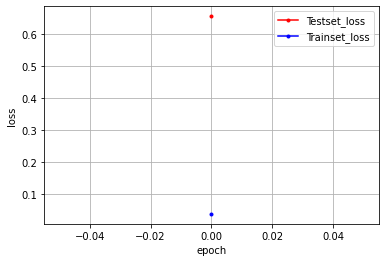

In [22]:
# 테스트셋 오차
y_vloss = history.history['val_loss']
# 학습셋의 오차
y_loss = history.history['loss']

# 그래프 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c='red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label = 'Trainset_loss')
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()